In [19]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
import os
from sklearn.utils import shuffle
from numpy import save
import process

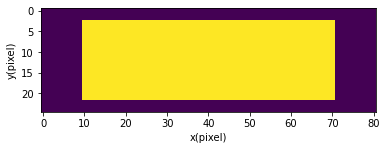

In [20]:
image = np.ones((25,81))
for i in range (3):
    image[i,:] = 0
    image[24-i,:] = 0
for i in range(10):
    image[:,i] = 0
    image[:,80-i] = 0
plt.imshow(image)
# plt.colorbar()
plt.xlabel('x(pixel)')
plt.ylabel('y(pixel)')
plt.savefig('books_read.png',dpi =300)

plt.show()

In [21]:

def model1(image_comp,top,bottom,left,right,dis,base,std):
    image=np.abs(image_comp)
    image_angle = np.angle(image_comp, deg=True)
    plot_graph(image)
    img_bg=image_bg(image, top, bottom, left, right, dis)
    img_corr= image_resize(image, top, bottom, left, right)
    img_sub= image_remove_bg(img_bg, img_corr)
    plot_graph(img_sub)
    peak,max_lin,max_col=image_max(img_sub)
    peak_angle= max_angle(image_angle, max_lin+top, max_col+left)
    img_length_finding,limit,ground=remove_noise_vertical(img_sub,base,std)
    plot_graph(img_length_finding)
    begin_line,end_line=find_length(img_length_finding)
    begin_col,end_col=find_width(img_length_finding, limit)
    max8=find_8max(img_length_finding, peak)
    length=end_line-begin_line
    width=end_col-begin_col
    hole=np.mean(np.mean(img_sub[max_lin-5:max_lin+6,:]))
    hole1=np.mean(np.std(img_sub[max_lin-5:max_lin+6,:],axis=1,ddof=1))
    print("Gia tri max cua tro khang la" ,peak)
    print("Gia tri trung binh lo la :",hole)
    print("Gia tri doc lo la :",hole1)
    print("Gia tri max cua tro khang co goc phase la",peak_angle)
    print("Chieu dai cua vet nut la",end_line,"-",begin_line,"=",length)
    print("Chieu rong cua vet nut la",end_col,"-",begin_col,"=",width)
    print("8 gia tri co tro khang cao nhat la", max8)
    print("limit", limit)
    print("ground", ground)
    return peak,hole,hole1,limit,ground

In [15]:
def model2(image_comp,top,bottom,left,right,dis,base,std):
    image=np.abs(image_comp)
    image_angle = np.angle(image_comp, deg=True)
#     plot_graph(image)
    img_bg=image_bg(image, top, bottom, left, right, dis)
    img_corr= image_resize(image, top, bottom, left, right)
    img_sub= image_remove_bg(img_bg, img_corr)
#     plot_graph(img_sub)
    peak,max_lin,max_col=image_max(img_sub)
    peak_angle= max_angle(image_angle, max_lin+top, max_col+left)
    img_length_finding,limit,ground=remove_noise_horizontal(img_sub,base,std)
#     plot_graph(img_length_finding)
    begin_line,end_line=find_length(img_length_finding)
    begin_col,end_col=find_width(img_length_finding, limit)
    max8=find_8max(img_length_finding, peak)
    length=end_line-begin_line
    width=end_col-begin_col
    hole=np.mean(np.mean(img_sub[max_lin-5:max_lin+6,:]))
    hole1=np.mean(np.std(img_sub[max_lin-5:max_lin+6,:],axis=1,ddof=1))
    print("Gia tri max cua tro khang la" ,peak)
    print("Gia tri trung binh lo la :",hole)
    print("Gia tri doc lo la :",hole1)
    print("Gia tri max cua tro khang co goc phase la",peak_angle)
    print("Chieu dai cua vet nut la",end_line,"-",begin_line,"=",length)
    print("Chieu rong cua vet nut la",end_col,"-",begin_col,"=",width)
    print("8 gia tri co tro khang cao nhat la", max8)
    print("limit", limit)
    print("ground",ground)
    return peak,hole,hole1,limit,ground

In [22]:
# name=["2A","2B","2E","2H","44A","45A","45C","45D"]
# path1="D:/PROJECT/Dòng xoáy/Dulieu-dong-xoay/1000"
# data=[]
# result=[]
# filename=[]
# for file in os.listdir(path1):
#     filename.append(file)
# print(filename)
# print(name)
# for i in range(1):
#     image_imag = Image.open(os.path.join(path1,filename[1],name[1]+"_500kHz_"+str(200*2**i)+"u_imagpart.tif"))
#     image_real = Image.open(os.path.join(path1,filename[1],name[1]+"_500kHz_"+str(200*2**i)+"u_realpart.tif"))
#     img_imag = np.array(image_imag)
#     img_real = np.array(image_real)
#     img1_comp= img_real + 1j*img_imag
#     print(name[1]+"_500kHz_"+str(200*2**i)+"u")
#     inp=np.zeros(6)
#     inp[0:5]=model1(img1_comp,10,10,3,1,15,20,1)
#     inp[5]=0
#     data.append(inp)
#     print("==========================================================================")

# for i in [1,2]:
#     image_imag = Image.open(os.path.join(path1,filename[1],name[1]+"_500kHz_"+str(200*2**i)+"u_imagpart.tif"))
#     image_real = Image.open(os.path.join(path1,filename[1],name[1]+"_500kHz_"+str(200*2**i)+"u_realpart.tif"))
#     img_imag = np.array(image_imag)
#     img_real = np.array(image_real)
#     img2_comp= img_real + 1j*img_imag
#     print(name[1]+"_500kHz_"+str(200*2**i)+"u")
#     inp=np.zeros(6)
#     inp[0:5]=model2(img2_comp,3,7,19,1,12,20,1)
#     inp[5]=0
#     data.append(inp)        
#     print("==========================================================================")
# for i in [0,4,5,2,3,6,7]:
#     for j in range(1):
#         image_imag = Image.open(os.path.join(path1,filename[i],name[i]+"_500kHz_"+str(200*2**j)+"u_imagpart.tif"))
#         image_real = Image.open(os.path.join(path1,filename[i],name[i]+"_500kHz_"+str(200*2**j)+"u_realpart.tif"))
#         img_imag = np.array(image_imag)
#         img_real = np.array(image_real)
#         img1_comp= img_real + 1j*img_imag
#         print(name[i]+"_500kHz_"+str(200*2**j)+"u")
#         inp=np.zeros(6)
#         inp[0:5]=model1(img1_comp,10,10,3,1,15,20,1)
#         inp[5]=0
#         data.append(inp)
#         print("==========================================================================")
#     for j in [1,2]:
#         image_imag = Image.open(os.path.join(path1,filename[i],name[i]+"_500kHz_"+str(200*2**j)+"u_imagpart.tif"))
#         image_real = Image.open(os.path.join(path1,filename[i],name[i]+"_500kHz_"+str(200*2**j)+"u_realpart.tif"))
#         img_imag = np.array(image_imag)
#         img_real = np.array(image_real)
#         img2_comp= img_real + 1j*img_imag
#         print(name[i]+"_500kHz_"+str(200*2**j)+"u")
#         inp=np.zeros(6)
#         inp[0:5]=model2(img2_comp,3,3,19,1,12,20,1)
#         inp[5]=0
#         data.append(inp)
#         print("==========================================================================")
#         print("==========================================================================")
#         print("==========================================================================")

In [23]:
# name=["2A","2B","2E","2H","44A","45A","45C","45D"]
# path2="Dulieu-dong-xoay/1003"
# filename=[]
# for file in os.listdir(path2):
#     print(file)
#     filename.append(file)
# for i in range(8):
#     for j in range(1):
#         image_imag = Image.open(os.path.join(path2,filename[i],name[i]+"_400kHz_"+str(200*2**j)+"u_imagpart.tif"))
#         image_real = Image.open(os.path.join(path2,filename[i],name[i]+"_400kHz_"+str(200*2**j)+"u_realpart.tif"))
#         img_imag = np.array(image_imag)
#         img_real = np.array(image_real)
#         img1_comp= img_real + 1j*img_imag
#         print(name[i]+"_500kHz_"+str(200*2**j)+"u")
#         inp=np.zeros(6)
#         inp[0:5]=model1(img1_comp,10,10,3,1,15,20,1)
#         inp[5]=1
#         data.append(inp)
#         print("==========================================================================")
#     for j in [1,2]:
#         image_imag = Image.open(os.path.join(path2,filename[i],name[i]+"_400kHz_"+str(200*2**j)+"u_imagpart.tif"))
#         image_real = Image.open(os.path.join(path2,filename[i],name[i]+"_400kHz_"+str(200*2**j)+"u_realpart.tif"))
#         img_imag = np.array(image_imag)
#         img_real = np.array(image_real)
#         img2_comp= img_real + 1j*img_imag
#         print(name[i]+"_500kHz_"+str(200*2**j)+"u")
#         inp=np.zeros(6)
#         inp[0:5]=model2(img2_comp,3,3,19,1,12,20,1)
#         inp[5]=1
#         data.append(inp)
#         print("==========================================================================")